In [33]:
# 라이브러리 import 영역

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [137]:
def draw_graph(fig, df1, df2):

    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    
    draw_ax(ax1, df1)
    ax1_2 = ax1.twinx()
    ax1_2.plot(df2.index, df2.생활물가, ls='--', marker='o', markersize=5, color='black', label='생활물가')
    ax1.set_ylim(0, 1500)
    ax1_2.set_ylim(-15, 15)
    ax1.set_ylabel('승인건수')
    ax1.set_title('생활물가 VS 국내카드승인실적')
    ax1_2.set_ylabel('생활물가')
    ax1.legend(loc='upper center')
    
    draw_ax(ax2, df1)
    ax2_2 = ax2.twinx()
    ax2_2.plot(df2.index, df2.신선식품, ls='--', marker='o', markersize=5, color='black', label='신선식품물가')
    ax2.set_ylim(0, 1500)
    ax2_2.set_ylim(-15, 35)
    ax2.set_ylabel('승인건수')
    ax2.set_title('신선식품 VS 국내카드승인실적')
    ax2_2.set_ylabel('신선식품물가')
    ax2.legend(loc='upper center')
   
    return plt

In [83]:
def draw_ax(ax, df):
    x_term = df.index
    x = np.arange(len(x_term))  # the label locations
    width = 0.3  # the width of the bars
    multiplier = 0
    
    for attribute, measurement in df.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1
        
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xticks(x + width, x_term)
    ax.set_xticklabels(x_term, rotation=75)
    ax.legend(loc='best')

In [26]:
# 데이터를 읽어 df1, df2 생성 부분
df = pd.read_csv('./월간_국내카드승인실적.csv', encoding='cp949')
df

,한국표준산업분류별,2019.01,2019.02,2019.03,2019.04,2019.05,2019.06,2019.07,2019.08,2019.09,...,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11
0,도매 및 소매업,3241,2890,3339,3215,3335,3096,3277,3335,3346,...,4047,4606,4673,4879,4695,5000,5033,5025,5051,5047
1,운수업,161,135,144,145,149,141,152,141,128,...,64,82,108,124,122,115,119,128,135,137
2,숙박 및 음식점업,1032,935,1083,1049,1136,1087,1114,1151,998,...,780,939,1150,1316,1248,1314,1276,1192,1316,1208
3,사업시설관리 및 사업지원 서비스업,48,37,40,41,43,40,46,39,40,...,20,27,32,35,34,34,31,34,40,38
4,교육서비스업,122,115,129,113,125,119,133,144,121,...,135,145,136,152,146,154,171,150,145,148
5,보건업 및 사회복지 서비스업,423,370,390,404,408,379,421,414,375,...,449,479,481,492,479,496,504,477,496,512
6,"예술, 스포츠 및 여가관련 서비스업",80,82,110,114,127,126,123,125,116,...,80,116,148,169,161,160,148,154,169,145
7,"협회 및 단체, 수리 및 기타 개인 서비스업",163,145,170,168,175,163,169,173,157,...,145,169,191,193,185,192,187,184,198,192


In [27]:
col_name_app = df['한국표준산업분류별']

df1 = df.drop('한국표준산업분류별', axis=1)

df1 = df1.T
df1.columns = col_name_app
df_app = df1.drop(['도매 및 소매업', '운수업', '사업시설관리 및 사업지원 서비스업', '예술, 스포츠 및 여가관련 서비스업', '협회 및 단체, 수리 및 기타 개인 서비스업'], axis=1)

df_app.columns = ['숙박/음식', '교육', '보건복지']
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 2019.01 to 2022.11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   숙박/음식   47 non-null     int64
 1   교육      47 non-null     int64
 2   보건복지    47 non-null     int64
dtypes: int64(3)
memory usage: 1.5+ KB


In [28]:
df_app

,숙박/음식,교육,보건복지
2019.01,1032,122,423
2019.02,935,115,370
2019.03,1083,129,390
2019.04,1049,113,404
2019.05,1136,125,408
2019.06,1087,119,379
2019.07,1114,133,421
2019.08,1151,144,414
2019.09,998,121,375
2019.10,1122,120,430


In [131]:
df2 = pd.read_csv('./월별_소비자물가_등락률.csv', encoding='cp949')
df2

,지수종류(1),2019.01,2019.01.1,2019.01.2,2019.02,2019.02.1,2019.02.2,2019.03,2019.03.1,2019.03.2,...,2022.08.2,2022.09,2022.09.1,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2
0,지수종류(1),전월비 (%),전년동월비(%),전년누계비(%),전월비 (%),전년동월비(%),전년누계비(%),전월비 (%),전년동월비(%),전년누계비(%),...,전년누계비(%),전월비 (%),전년동월비(%),전년누계비(%),전월비 (%),전년동월비(%),전년누계비(%),전월비 (%),전년동월비(%),전년누계비(%)
1,총지수,-0.1,0.8,0.8,0.4,0.5,0.6,-0.2,0.4,0.5,...,5.0,0.3,5.6,5.0,0.3,5.7,5.1,-0.1,5.0,5.1
2,생활물가지수,-0.3,0.4,0.4,0.6,0.0,0.2,-0.2,0.0,0.2,...,6.0,0.6,6.5,6.0,0.1,6.5,6.1,-0.3,5.5,6.0
3,신선식품지수,-0.2,1.2,1.2,2.1,-5.2,-2.2,-3.1,-3.0,-2.4,...,4.8,2.8,12.8,5.7,-6.1,11.4,6.3,-8.0,0.8,5.8
4,농산물및석유류제외지수,0.2,1.2,1.2,0.4,1.3,1.2,-0.1,0.9,1.1,...,3.8,0.3,4.5,3.9,0.6,4.8,4.0,0.3,4.8,4.1
5,식료품및에너지제외지수,0.2,1.0,1.0,0.5,1.1,1.1,-0.2,0.7,1.0,...,3.3,0.0,4.1,3.4,0.4,4.2,3.5,0.3,4.3,3.6


In [132]:
df2 = df2.drop('지수종류(1)', axis=1)
df_idx = pd.DataFrame(df2.iloc[2:4])

df_idx.index = ['생활물가', '신선식품']
df_idx_T = df_idx.T

df_idx_T['cols'] = df_idx_T.index
df_idx_T['cols'] = df_idx_T['cols'].apply(lambda x:len(x)<=7)
df_idx = df_idx_T.loc[df_idx_T.cols, :]
df_idx = df_idx.drop('cols', axis=1)

df_idx = df_idx.astype(float)

df_idx_cum = df_idx.cumsum()

print(df_idx_cum.info())

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 2019.01 to 2022.11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   생활물가    47 non-null     float64
 1   신선식품    47 non-null     float64
dtypes: float64(2)
memory usage: 1.1+ KB
None


In [133]:
df_idx_cum

,생활물가,신선식품
2019.01,-3.000000e-01,-2.000000e-01
2019.02,3.000000e-01,1.900000e+00
2019.03,1.000000e-01,-1.200000e+00
2019.04,4.000000e-01,-5.000000e-01
2019.05,9.000000e-01,-3.500000e+00
2019.06,8.000000e-01,-7.000000e+00
2019.07,-1.110223e-16,-9.500000e+00
2019.08,3.000000e-01,-6.100000e+00
2019.09,1.100000e+00,1.500000e+00
2019.10,1.500000e+00,1.400000e+00


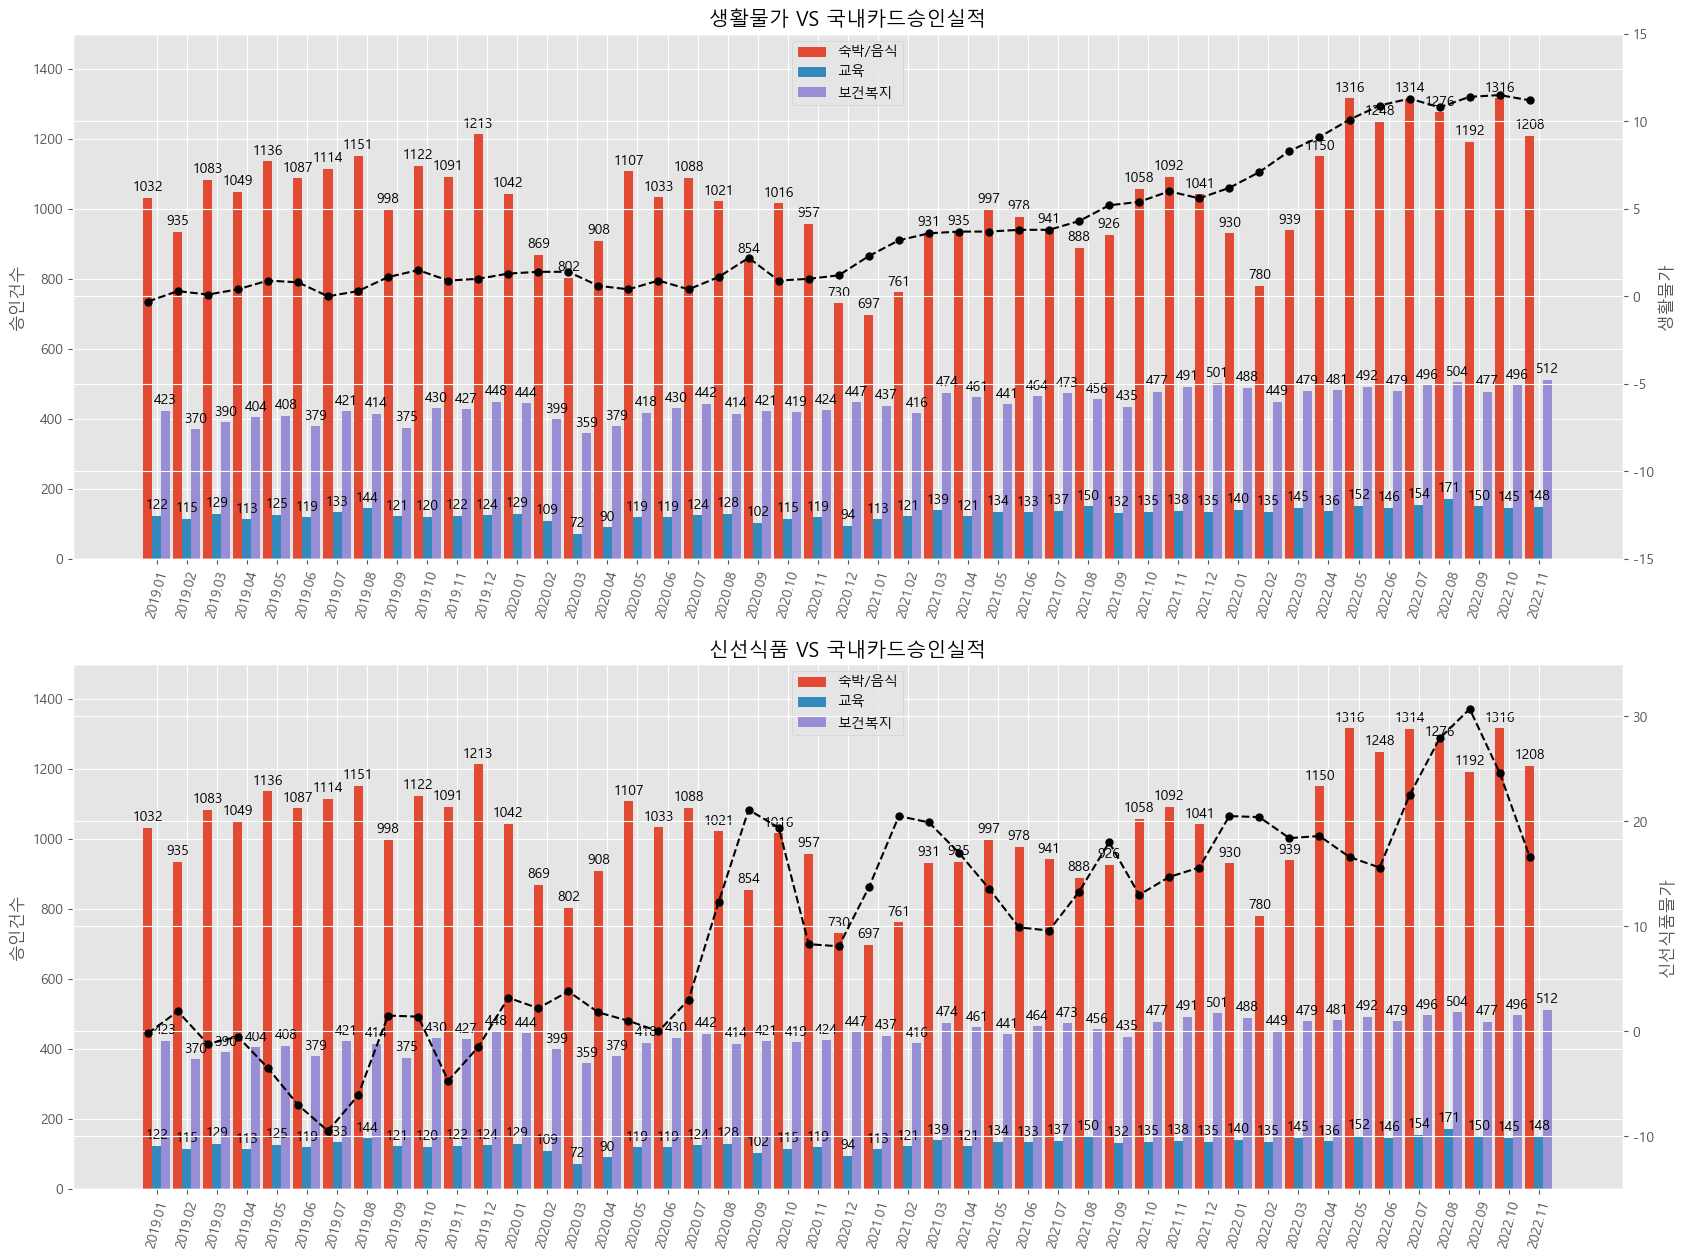

In [138]:
# print(df_idx_cum)

fig = plt.figure(figsize=(20, 15))
plt = draw_graph(fig, df_app, df_idx_cum)
plt.style.use('ggplot')

plt.show()